<a href="https://colab.research.google.com/github/Lordelva/SEGMENTACIONCLIENTES/blob/main/Reto_segmentaci%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="DATA CHALLENGE 356 FEM-04" height="100px" src="https://www.datasciencefem.com/static/img/home/DATA%20CHALLENGE%20356%20FEM-04.png" align="left" hspace="10px" vspace="0px"></p>

<h1>Reto: Segmentación de Clientes</h1>

In [2]:
# contenedor google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<p><img alt="DATA CHALLENGE 356 FEM-04" height="50px" src="https://w7.pngwing.com/pngs/81/163/png-transparent-computer-icons-database-data-quality-configuration-data-big-data-data-quality.png" align="left" hspace="10px" vspace="0px"></p>

## <strong>Primeros pasos: Calidad de datos</strong>

---



In [3]:
pip install squarify

In [4]:
# Importar Librerías
import pandas as pd
import numpy as np
from scipy import stats
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re
import squarify
from sklearn.cluster import KMeans

In [5]:
df= pd.read_csv("/content/drive/MyDrive/Reto segmentación de clientes/marketing_data.csv", sep=",")

In [6]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

**Análisis Univariado**

In [8]:
# Tipo de datos y missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

1. Observamos el primer problema de calidad de datos debido a que no hay conformidad con la variable income debido a que está tipo objeto

In [9]:
# Observamos el verdadero tipo de la variable
df[' Income '].dtype

dtype('O')

In [10]:
# Hacemos una copia de la variable convirtiendola toda a tipo str con el fin de realizar una limpieza adecuada
df['Income'] = df[' Income '].astype(str)

In [11]:
# Validar si la variable contiene el caracter especial
df['validacion'] = df['Income'].str.contains(pat='$')

In [12]:
# Observar cuantos registros contienen este caracter especial
df['validacion'].value_counts()

True    2240
Name: validacion, dtype: int64

In [13]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,validacion
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,"$84,835.00",True
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,"$57,091.00",True
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,"$67,267.00",True
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,"$32,474.00",True
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,"$21,474.00",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,"$66,476.00",True
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,"$31,056.00",True
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,"$46,310.00",True
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,"$65,819.00",True


In [14]:
charsToRemove = ["$", ","]
df['Income']=   df['Income'].str.replace(r"[{}]+".format("".join([re.escape(x) for x in charsToRemove])),"")

In [15]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,validacion
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,84835.00,True
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.00,True
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67267.00,True
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,32474.00,True
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,21474.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,66476.00,True
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,31056.00,True
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,46310.00,True
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,65819.00,True


In [16]:
 df['Income'] = df['Income'].astype(float)

In [17]:
df["Income"].dtype

dtype('float64')

In [18]:
df=df.drop(columns=[' Income ','validacion'])
df

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income
0,1826,1970,Graduation,Divorced,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,84835.0
1,1,1961,Graduation,Single,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.0
2,10476,1958,Graduation,Married,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67267.0
3,1386,1967,Graduation,Together,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,32474.0
4,5371,1989,Graduation,Single,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,21474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,66476.0
2236,5263,1977,2n Cycle,Married,1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,31056.0
2237,22,1976,Graduation,Divorced,1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,46310.0
2238,528,1978,Graduation,Married,0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,65819.0


2. Observamos que entre los datos falta una variable importante que es la edad de los clientes, debido a que lo que tenemos es su año de nacimiento, lo que haremos es calcular su edad al momento de la compra

In [19]:
df['Dt_Customer_1'] = "20" + df['Dt_Customer'].str.slice(-2)

In [20]:
df['Dt_Customer_1'] = df['Dt_Customer_1'].astype(int)

In [21]:
df['Dt_Customer_1'].value_counts()

2013    1189
2014     557
2012     494
Name: Dt_Customer_1, dtype: int64

In [22]:
df['Age'] =  df['Dt_Customer_1'] -df['Year_Birth']

In [23]:
df

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Dt_Customer_1,Age
0,1826,1970,Graduation,Divorced,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,84835.0,2014,44
1,1,1961,Graduation,Single,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.0,2014,53
2,10476,1958,Graduation,Married,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67267.0,2014,56
3,1386,1967,Graduation,Together,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,32474.0,2014,47
4,5371,1989,Graduation,Single,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,21474.0,2014,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,66476.0,2013,37
2236,5263,1977,2n Cycle,Married,1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,31056.0,2013,36
2237,22,1976,Graduation,Divorced,1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,46310.0,2012,36
2238,528,1978,Graduation,Married,0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,65819.0,2012,34


**Análisis variables numéricas**

In [24]:
# Estadisticas descriptivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


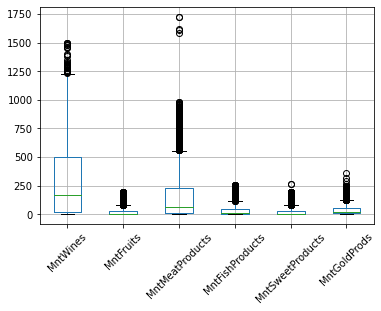

In [25]:
boxplot = df.boxplot(rot=45,column=['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'])

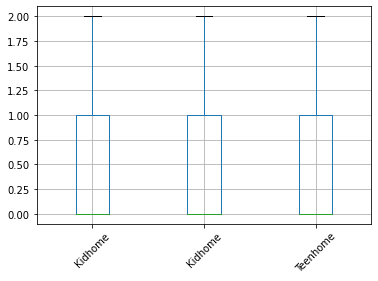

In [26]:
boxplot = df.boxplot(column=['Kidhome','Kidhome','Teenhome'],rot=45 )

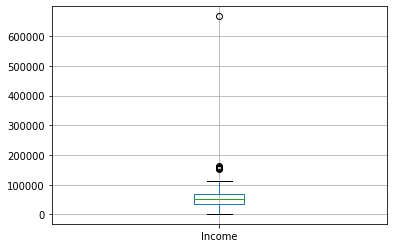

In [27]:
boxplot = df.boxplot(column=['Income'])

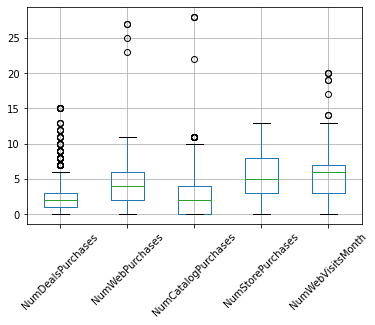

In [28]:
boxplot = df.boxplot(column=['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],rot=45)

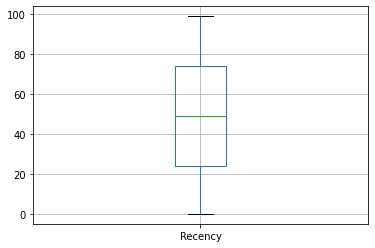

In [29]:
boxplot = df.boxplot(column=['Recency'])

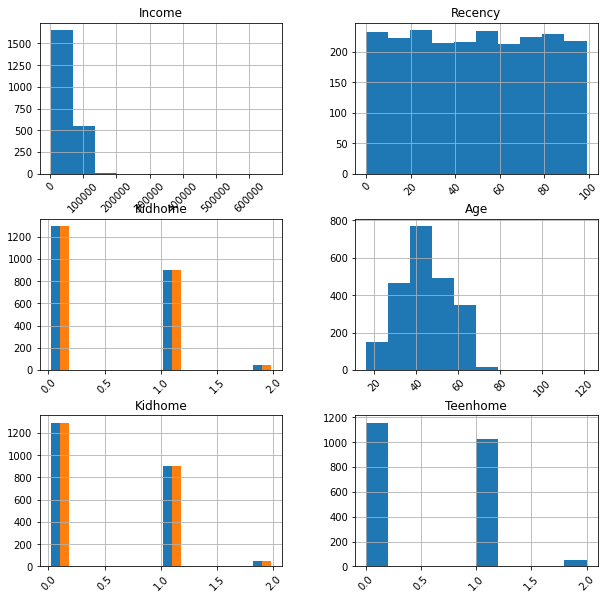

In [30]:
# Histograma de distribución
hisotgram = df.hist(column=['Income', 'Recency', 'Kidhome','Age','Kidhome','Teenhome'],xrot=45,figsize=(10,10))

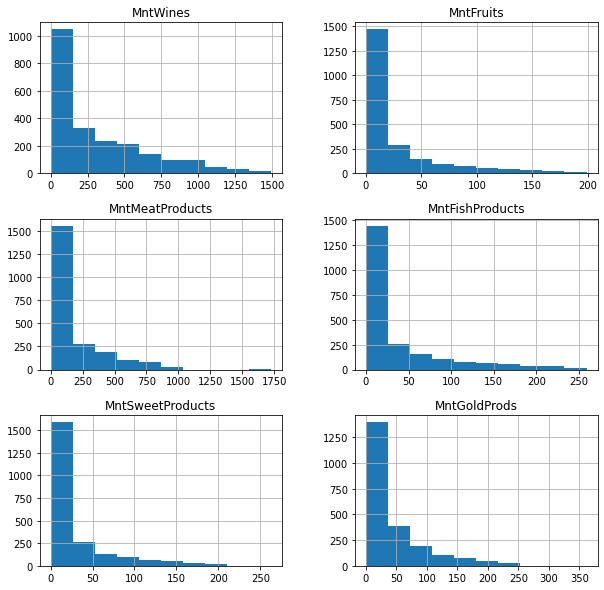

In [31]:
hisotgram = df.hist(column=['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'],figsize=(10,10) )

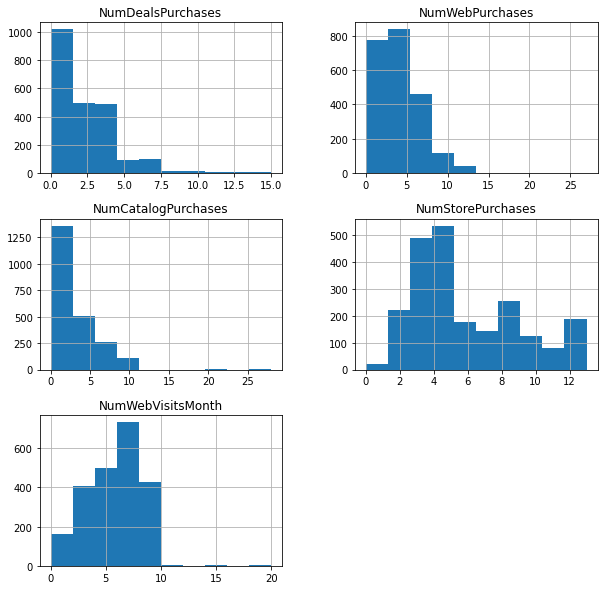

In [32]:
hisotgram = df.hist(column=['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],figsize=(10,10) )

**Análisis variables Categoricas**

In [33]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [34]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [35]:
df['Country'].value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [36]:
df['Teenhome'].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [37]:
df['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [38]:
df['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

In [39]:
df['AcceptedCmp2'].value_counts()

0    2210
1      30
Name: AcceptedCmp2, dtype: int64

In [40]:
# Cuando aceptaron la oferta en la tercera campaña
df['AcceptedCmp3'].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

In [41]:
df['AcceptedCmp4'].value_counts()

0    2073
1     167
Name: AcceptedCmp4, dtype: int64

In [42]:
df['AcceptedCmp5'].value_counts()

0    2077
1     163
Name: AcceptedCmp5, dtype: int64

**Análisis Bivariado**

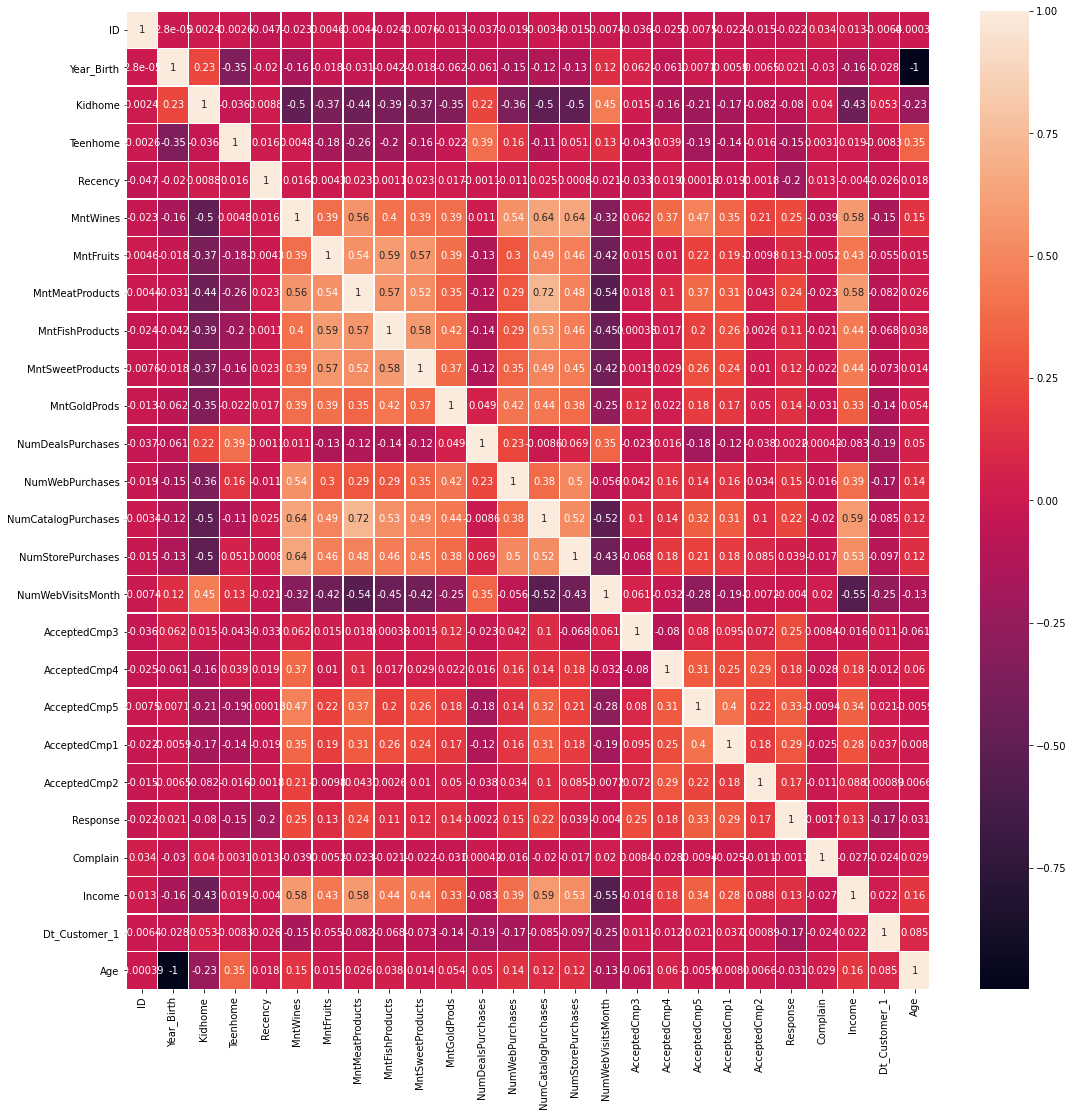

In [43]:
# Correlaciones
fig, ax = plt.subplots(figsize=(18,18))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)




<p><img alt="DATA CHALLENGE 356 FEM-04" height="60px" src="https://w7.pngwing.com/pngs/612/618/png-transparent-audience-segmentation-market-segmentation-marketing-marketing-performance-advance-segment.png" align="left" hspace="10px" vspace="0px"></p>

## <strong>ANÁLISIS DE SEGMENTACIÓN DE DATOS</strong>

---

In [44]:
# Prodríamos hacer una segmentación de características de cada cliente por cada una de las campañas
df1=df[df['AcceptedCmp1']==1]
df2= df1.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Dt_Customer_1','Education','Marital_Status','Dt_Customer','Country'])
df2.agg(["min","max","mean", "median"]).T

,min,max,mean,median
ID,146.0,10965.0,5324.493056,4901.5
Year_Birth,1944.0,1994.0,1968.534722,1969.5
Kidhome,0.0,2.0,0.090278,0.0
Teenhome,0.0,2.0,0.215278,0.0
Recency,1.0,99.0,46.979167,45.5
MntWines,152.0,1493.0,758.604167,761.5
MntFruits,0.0,190.0,55.847222,29.5
MntMeatProducts,21.0,974.0,433.638889,437.5
MntFishProducts,0.0,253.0,91.861111,76.0
MntSweetProducts,0.0,194.0,65.138889,46.5


## <strong>RMF:  Modelo de recencia, frecuencia y monto</strong>

- La intuición de este modelo permite determinar cuáles son los mejores clientes teniendo en cuenta cuándo realizaron su última compra, con qué frecuencia lo hacen y cuánto se gastan.

- Herramienta usada dentro del marketring para implementar propuestas de marketing

Las variables principalmente de este modelo son:

1. ***Recencia***: ¿Cuándo fue la última vez que el cliente compró?
2. ***Frecuencia***: ¿Cuánto compró el cliente?
3. ***Monto***: ¿Cuánto gastó?

A partir de ahí se procede a la segmentación de la base de datos de clientes, a cada variable se le concede un valor del 1 al 5, siendo 1 la peor puntuación y 5, la mejor. Es decir, se pueden construir escalas por quintiles. La puntuación mayor será la de aquellos clientes que obtengan R5, F5 y VM5, o lo que es lo mismo, los que han comprado más recientemente, lo hacen con más frecuencia y gastan más dinero.

El análisis RFM aplicado al marketing, incrementa el grado de engagement y permite a la marca dirigir promociones específicas a cada grupo de clientes, mejorando las tasas de conversión y logrando un mejor resultado en las campañas.


In [45]:
# Para observar si existen ID repetidos, pero observamos que los datos no requieren de una preparación adicional para crear las variables de recencia y frecuencia
df.sort_values(by=['ID'],ascending=False)

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Dt_Customer_1,Age
261,11191,1986,Graduation,Divorced,0,0,12/7/13,11,37,32,38,11,3,18,1,2,1,4,6,0,0,0,0,0,0,0,SP,41411.0,2013,27
1897,11188,1957,Graduation,Together,1,1,2/25/14,84,15,10,19,8,17,20,3,2,1,3,5,0,0,0,0,0,0,0,SP,26091.0,2014,57
529,11187,1978,Basic,Single,1,0,5/20/13,23,2,8,10,12,14,23,3,2,1,3,5,0,0,0,0,0,0,0,CA,26487.0,2013,35
1925,11181,1949,PhD,Married,0,0,8/29/13,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,CA,156924.0,2013,64
1554,11178,1972,Master,Single,1,0,3/23/14,69,15,2,10,0,1,4,1,1,0,3,7,0,0,0,0,0,0,0,GER,42394.0,2014,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,17,1971,PhD,Married,0,1,9/6/13,81,637,47,237,12,19,76,4,6,11,7,5,0,0,0,0,0,0,0,SP,60491.0,2013,42
1311,13,1947,PhD,Widow,0,1,7/22/13,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,0,SA,25358.0,2013,66
1956,9,1975,Master,Single,1,1,8/18/12,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,0,CA,46098.0,2012,37
1,1,1961,Graduation,Single,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.0,2014,53


In [46]:
# Crear variables de Frecuencia y monto
df["money"]=df["MntMeatProducts"] + df['MntFishProducts'] + df['MntSweetProducts']+ df['MntGoldProds']
df["frequency"]=df["NumDealsPurchases"] + df['NumWebPurchases'] + df['NumCatalogPurchases']+ df['NumStorePurchases'] +df['NumWebVisitsMonth']

**Vamos a crear la base de datos solo con las variables para el RFM**

In [47]:
rfm=df[['ID','Recency','money','frequency']]
rfm= rfm.sort_values(by=['ID'])
rfm.set_index('ID',inplace=True)
rfm

,Recency,money,frequency
ID,,,
0,66,949,18
1,0,108,23
9,86,63,19
13,57,13,12
17,81,344,33
...,...,...,...
11178,69,15,12
11181,85,5,0
11187,23,59,14


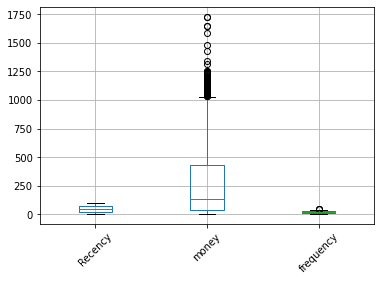

In [48]:
boxplot = rfm.boxplot(column=['Recency','money','frequency'],rot=45 )

está dentro del grupo que compró más recientemente (R = 1)
está dentro del grupo que compró la mayor cantidad (F = 1)
se encuentra dentro del grupo que pasó la mayor parte (M = 1)

In [49]:
rfm

,Recency,money,frequency
ID,,,
0,66,949,18
1,0,108,23
9,86,63,19
13,57,13,12
17,81,344,33
...,...,...,...
11178,69,15,12
11181,85,5,0
11187,23,59,14


La forma más sencilla de crear segmentos de clientes a partir del modelo RFM es utilizar Quartiles. Asignamos una puntuación de 1 a 4 a Actualidad, Frecuencia y Monetaria. Cuatro es el valor mejor / más alto y uno es el valor más bajo / peor. Una puntuación RFM final se calcula simplemente combinando números de puntuación RFM individuales.

In [50]:
# Puntuación
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,money,frequency
0.25,24.0,38.0,14.0
0.50,49.0,133.0,19.0
0.75,74.0,435.0,25.0


In [51]:
quantiles.to_dict()

{'Recency': {0.25: 24.0, 0.5: 49.0, 0.75: 74.0},
 'frequency': {0.25: 14.0, 0.5: 19.0, 0.75: 25.0},
 'money': {0.25: 38.0, 0.5: 133.0, 0.75: 435.0}}

In [52]:
# Crear los segmentos de RFM
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [53]:
# Crear la tabla de segmentación RFM
rfm_segmentation = rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['money'].apply(FMScore, args=('money',quantiles,))

In [54]:
rfm_segmentation.head()

,Recency,money,frequency,R_Quartile,F_Quartile,M_Quartile
ID,,,,,,
0,66,949,18,2,2,4
1,0,108,23,4,3,2
9,86,63,19,1,2,2
13,57,13,12,2,1,1
17,81,344,33,1,4,3


Ahora que tenemos la puntuación de cada cliente, podemos representar nuestra segmentación de clientes. Primero, necesitamos combinar las puntuaciones (R_Quartile, F_Quartile, M_Quartile) juntas.

In [55]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,money,frequency,R_Quartile,F_Quartile,M_Quartile,RFMScore
ID,,,,,,,
0,66,949,18,2,2,4,224
1,0,108,23,4,3,2,432
9,86,63,19,1,2,2,122
13,57,13,12,2,1,1,211
17,81,344,33,1,4,3,143


Mejor puntuación de experiencia reciente = 4: compra más reciente. Mejor puntuación de frecuencia = 4: mayor cantidad de compra. Mejor puntuación monetaria = 4: más gastado.

In [56]:
# Observar los clientes que tienen el mejor Score
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('money', ascending=False).head(10)

,Recency,money,frequency,R_Quartile,F_Quartile,M_Quartile,RFMScore
ID,,,,,,,
4931,13,1729,29,4,4,4,444
1501,21,1646,44,4,4,4,444
10814,6,1050,29,4,4,4,444
5031,14,1021,28,4,4,4,444
4114,2,1006,32,4,4,4,444
10133,16,979,27,4,4,4,444
3403,11,903,27,4,4,4,444
7849,12,824,26,4,4,4,444
3690,20,805,28,4,4,4,444


In [57]:
# Regresamos el ID como variable en vez de indice
rfm_segmentation.reset_index(level=['ID'])

,ID,Recency,money,frequency,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,0,66,949,18,2,2,4,224
1,1,0,108,23,4,3,2,432
2,9,86,63,19,1,2,2,122
3,13,57,13,12,2,1,1,211
4,17,81,344,33,1,4,3,143
...,...,...,...,...,...,...,...,...
2235,11178,69,15,12,2,1,1,211
2236,11181,85,5,0,1,1,1,111
2237,11187,23,59,14,4,1,2,412
2238,11188,84,64,14,1,1,2,112


In [58]:
# Sacar las variables repetidas de df
df_merge=df.drop(columns=['Recency','frequency','money','Dt_Customer_1','Dt_Customer','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'])
df_merge

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Age
0,1826,1970,Graduation,Divorced,0,0,0,0,0,0,0,1,0,SP,84835.0,44
1,1,1961,Graduation,Single,0,0,0,0,0,0,1,1,0,CA,57091.0,53
2,10476,1958,Graduation,Married,0,1,0,0,0,0,0,0,0,US,67267.0,56
3,1386,1967,Graduation,Together,1,1,0,0,0,0,0,0,0,AUS,32474.0,47
4,5371,1989,Graduation,Single,1,0,1,0,0,0,0,1,0,SP,21474.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,0,1,0,0,0,0,0,0,0,US,66476.0,37
2236,5263,1977,2n Cycle,Married,1,0,0,0,0,0,0,0,0,SP,31056.0,36
2237,22,1976,Graduation,Divorced,1,0,0,0,0,0,0,0,0,SP,46310.0,36
2238,528,1978,Graduation,Married,0,0,0,0,0,0,0,0,0,IND,65819.0,34


In [59]:
# Unir la información para caracterizar los segmentos de clientes

caracerizacion_df = rfm_segmentation.merge(df_merge,on='ID')
caracerizacion_df

,ID,Recency,money,frequency,R_Quartile,F_Quartile,M_Quartile,RFMScore,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Age
0,0,66,949,18,2,2,4,224,1985,Graduation,Married,0,0,0,0,0,0,0,0,0,SA,70951.0,28
1,1,0,108,23,4,3,2,432,1961,Graduation,Single,0,0,0,0,0,0,1,1,0,CA,57091.0,53
2,9,86,63,19,1,2,2,122,1975,Master,Single,1,1,0,0,0,0,0,0,0,CA,46098.0,37
3,13,57,13,12,2,1,1,211,1947,PhD,Widow,0,1,0,0,0,0,0,0,0,SA,25358.0,66
4,17,81,344,33,1,4,3,143,1971,PhD,Married,0,1,0,0,0,0,0,0,0,SP,60491.0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,11178,69,15,12,2,1,1,211,1972,Master,Single,1,0,0,0,0,0,0,0,0,GER,42394.0,42
2236,11181,85,5,0,1,1,1,111,1949,PhD,Married,0,0,0,0,0,0,0,0,0,CA,156924.0,64
2237,11187,23,59,14,4,1,2,412,1978,Basic,Single,1,0,0,0,0,0,0,0,0,CA,26487.0,35
2238,11188,84,64,14,1,1,2,112,1957,Graduation,Together,1,1,0,0,0,0,0,0,0,SP,26091.0,57


In [60]:
caracerizacion_df['rango_edad'] = 'Unknown'
caracerizacion_df.loc[caracerizacion_df['Age'].between(16, 18, inclusive=True), 'rango_edad'] = 'Adolescente'
caracerizacion_df.loc[caracerizacion_df['Age'].between(19, 26, inclusive=True), 'rango_edad'] = 'Adulto Joven'
caracerizacion_df.loc[caracerizacion_df['Age'].between(27, 59, inclusive=True), 'rango_edad'] = 'Adulto'
caracerizacion_df.loc[caracerizacion_df['Age'].between(60, 100, inclusive=True), 'rango_edad'] = 'Adulto Mayor'

In [61]:
# Todos los tipos de clientes
caracerizacion_df['RFMScore'].unique()

array(['224', '432', '122', '211', '143', '112', '132', '121', '434',
       '323', '311', '142', '421', '111', '333', '412', '312', '422',
       '123', '232', '134', '144', '223', '344', '332', '334', '433',
       '222', '234', '443', '233', '243', '331', '322', '414', '133',
       '131', '342', '244', '124', '444', '212', '411', '343', '324',
       '442', '242', '321', '221', '424', '423', '114', '313', '441',
       '213', '241', '231', '113', '431', '141', '314', '214', '341'],
      dtype=object)

In [62]:
# Clientes de interés
caracerizacion_df['etiqueta'] = 'Unknown'
caracerizacion_df.loc[(caracerizacion_df['RFMScore'] =='444'), 'etiqueta'] = 'Los mejores clientes'
caracerizacion_df.loc[(caracerizacion_df['F_Quartile'] ==4), 'etiqueta'] = 'Clientes leales'
caracerizacion_df.loc[(caracerizacion_df['M_Quartile'] ==4), 'etiqueta'] = 'Grandes gastadores'
caracerizacion_df.loc[(caracerizacion_df['RFMScore'] =='244'), 'etiqueta'] = 'Cliente casi perdido'
caracerizacion_df.loc[(caracerizacion_df['RFMScore'] =='144'), 'etiqueta'] = 'Cliente perdidos'
caracerizacion_df.loc[(caracerizacion_df['RFMScore'] =='111'), 'etiqueta'] = 'Clientes baratos perdido'

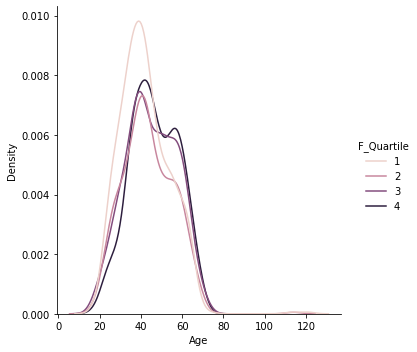

In [63]:
sns.displot(caracerizacion_df, x="Age", hue="F_Quartile", kind="kde")


In [64]:
caracerizacion_df1=caracerizacion_df[caracerizacion_df['etiqueta']!='Unknown']

In [65]:
caracerizacion_df1

,ID,Recency,money,frequency,R_Quartile,F_Quartile,M_Quartile,RFMScore,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Age,rango_edad,etiqueta
0,0,66,949,18,2,2,4,224,1985,Graduation,Married,0,0,0,0,0,0,0,0,0,SA,70951.0,28,Adulto,Grandes gastadores
4,17,81,344,33,1,4,3,143,1971,PhD,Married,0,1,0,0,0,0,0,0,0,SP,60491.0,42,Adulto,Clientes leales
8,25,9,620,25,4,3,4,434,1958,Graduation,Married,0,1,0,0,0,0,0,0,0,CA,65148.0,54,Adulto,Grandes gastadores
12,55,83,88,28,1,4,2,142,1963,Graduation,Together,0,1,0,0,0,0,0,0,0,SP,56253.0,49,Adulto,Clientes leales
14,73,81,4,9,1,1,1,111,1953,PhD,Single,1,2,0,0,0,0,0,0,0,IND,51411.0,60,Adulto Mayor,Clientes baratos perdido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,11112,23,627,28,4,4,4,444,1966,Graduation,Together,0,1,0,0,0,0,0,0,0,SP,70713.0,46,Adulto,Grandes gastadores
2230,11133,3,99,27,4,4,2,442,1973,PhD,YOLO,0,1,0,0,0,0,0,1,0,IND,48432.0,39,Adulto,Clientes leales
2231,11148,85,10,12,1,1,1,111,1975,Graduation,Together,1,0,0,0,0,0,0,0,0,SP,22280.0,38,Adulto,Clientes baratos perdido
2233,11171,60,116,28,2,4,2,242,1965,Master,Married,2,1,0,0,0,0,0,0,0,AUS,56962.0,48,Adulto,Clientes leales


Text(0.5, 0.98, 'Distribución de los clientes según su edad y su monto')

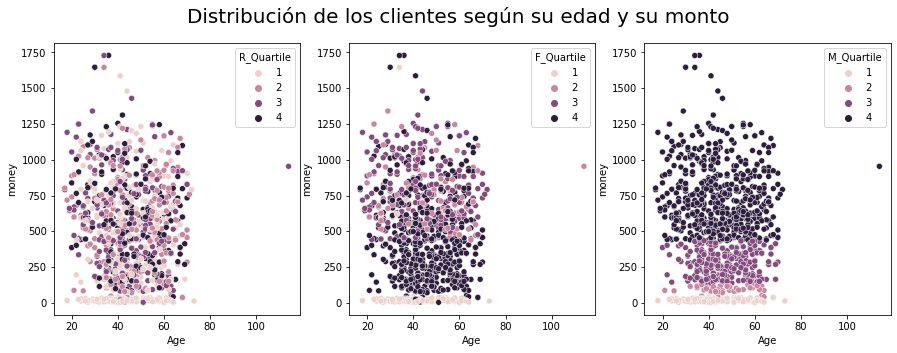

In [66]:
col = ['R_Quartile', 'F_Quartile', 'M_Quartile']

figure,axis = plt.subplots(1,3,figsize=(15,5))
for i in col:
  idx=col.index(i)
  custom_palette = ['#DECBE4','#0000FF','#FFFFCC']
  g=sns.scatterplot(ax=axis[idx],data=caracerizacion_df1, x="Age", y="money",hue=i)
  sns.set_palette(custom_palette)

g.figure.suptitle('Distribución de los clientes según su edad y su monto', size=20)

Text(0.5, 0.98, 'Distribución de los clientes según su edad y su recencia')

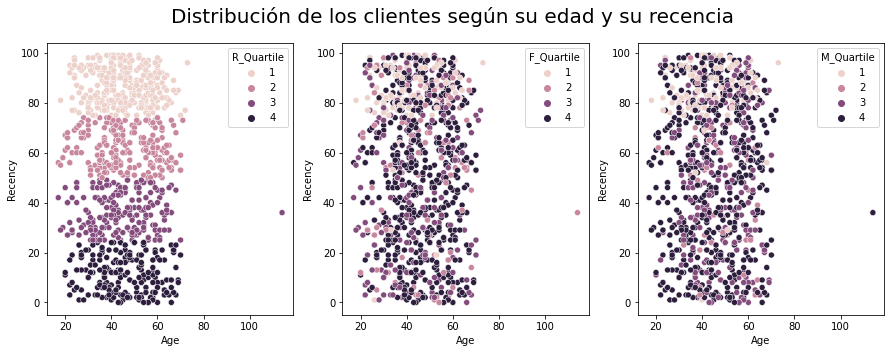

In [67]:
col = ['R_Quartile', 'F_Quartile', 'M_Quartile']

figure,axis = plt.subplots(1,3,figsize=(15,5))
for i in col:
  idx=col.index(i)
  custom_palette = ['#DECBE4','#0000FF','#FFFFCC']
  g=sns.scatterplot(ax=axis[idx],data=caracerizacion_df1, x="Age", y="Recency",hue=i)
  sns.set_palette(custom_palette)

g.figure.suptitle('Distribución de los clientes según su edad y su recencia', size=20)

Text(0.5, 0.98, 'Distribución de los clientes según su edad y su frecuencia')

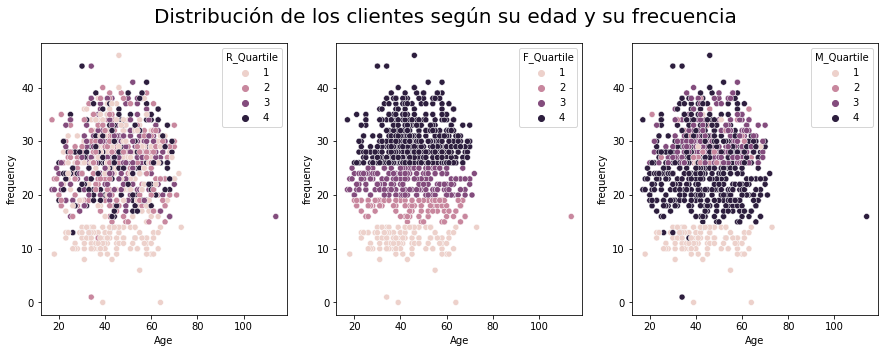

In [68]:
col = ['R_Quartile', 'F_Quartile', 'M_Quartile']

figure,axis = plt.subplots(1,3,figsize=(15,5))
for i in col:
  idx=col.index(i)
  custom_palette = ['#DECBE4','#0000FF','#FFFFCC']
  g=sns.scatterplot(ax=axis[idx],data=caracerizacion_df1, x="Age", y="frequency",hue=i)
  sns.set_palette(custom_palette)

g.figure.suptitle('Distribución de los clientes según su edad y su frecuencia', size=20)

In [69]:
a= ['Recency', 'frequency', 'money','Age','etiqueta','Marital_Status','Education','Kidhome']

In [70]:
caracerizacion_df2=caracerizacion_df1[a]
caracerizacion_df2

,Recency,frequency,money,Age,etiqueta,Marital_Status,Education,Kidhome
0,66,18,949,28,Grandes gastadores,Married,Graduation,0
4,81,33,344,42,Clientes leales,Married,PhD,0
8,9,25,620,54,Grandes gastadores,Married,Graduation,0
12,83,28,88,49,Clientes leales,Together,Graduation,0
14,81,9,4,60,Clientes baratos perdido,Single,PhD,1
...,...,...,...,...,...,...,...,...
2227,23,28,627,46,Grandes gastadores,Together,Graduation,0
2230,3,27,99,39,Clientes leales,YOLO,PhD,0
2231,85,12,10,38,Clientes baratos perdido,Together,Graduation,1
2233,60,28,116,48,Clientes leales,Married,Master,2


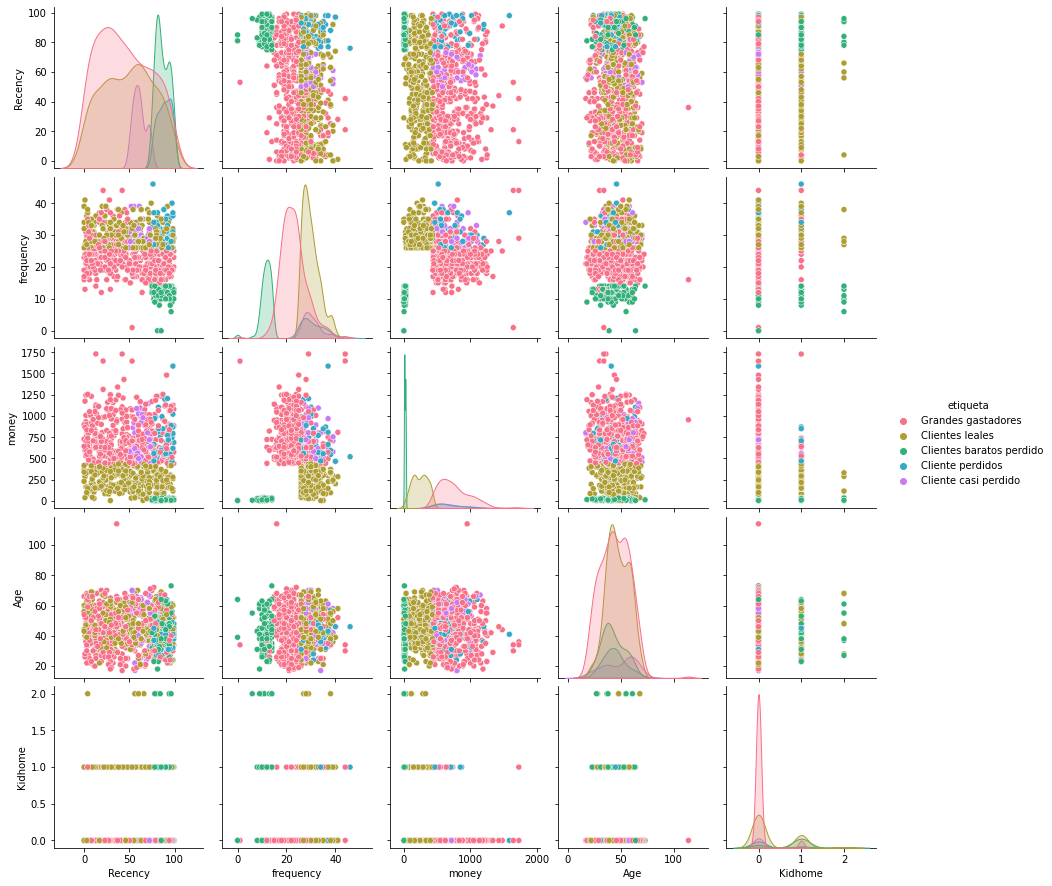

In [71]:
sns.pairplot(caracerizacion_df2,hue='etiqueta')


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


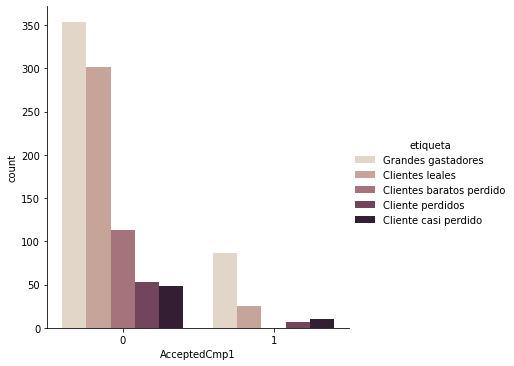

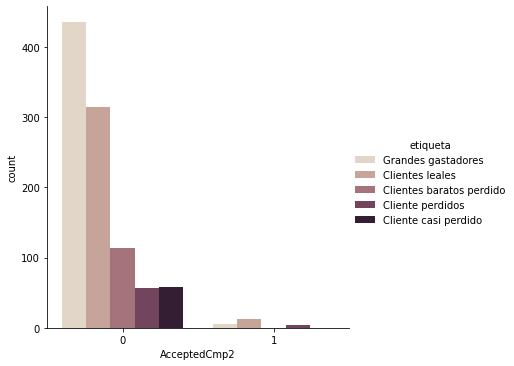

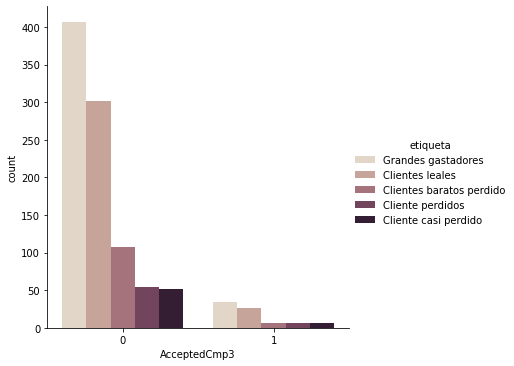

In [72]:
col = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3']

for i in col:
  idx=col.index(i)
  custom_palette = ['#DECBE4','#0000FF','#FFFFCC']
  g=sns.catplot(ax=axis[idx],x=i,hue='etiqueta', kind="count", palette="ch:.25", data=caracerizacion_df1)
  sns.set_palette(custom_palette)